In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace = True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [13]:
np.mean(cross_val_score(clf,X,y,cv=10,scoring = 'accuracy'))

0.6303208137715179

In [14]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy ='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy ='quantile')

In [16]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [17]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [21]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [22]:
trf.named_transformers_['first']

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [23]:
trf.named_transformers_['first'].n_bins_

array([10])

In [36]:
trf.named_transformers_['first'].bin_edges_[0].tolist()

[1.0,
 11.0,
 17.0,
 20.6,
 24.0,
 28.0,
 30.1,
 34.39999999999999,
 38.60000000000001,
 47.8,
 62.0]

In [27]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [34]:
output['age_labels']= pd.cut(x=X_train['Age'],bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']= pd.cut(x=X_train['Fare'],bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [37]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
174,56.0,9.0,30.6958,7.0,"(47.8, 62.0]","(28.39, 38.1]"
344,36.0,7.0,13.0000,4.0,"(34.4, 38.6]","(10.5, 14.454]"
554,22.0,3.0,7.7750,1.0,"(20.6, 24.0]","(7.743, 7.925]"
615,24.0,3.0,65.0000,8.0,"(20.6, 24.0]","(57.783, 512.329]"
532,17.0,1.0,7.2292,0.0,"(11.0, 17.0]","(0.0, 7.743]"


In [32]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf , y_train)
y_pred2 = clf.predict(X_test_trf)
accuracy_score(y_test,y_pred2)

0.6853146853146853

In [38]:
np.mean(cross_val_score(clf, X,y,cv=10,scoring='accuracy'))

0.6345266040688575

In [47]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy =strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy =strategy)    

    trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,1])
    plt.title('After')
    
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,0])
    plt.title('After')

    plt.show()

0.682140062597809


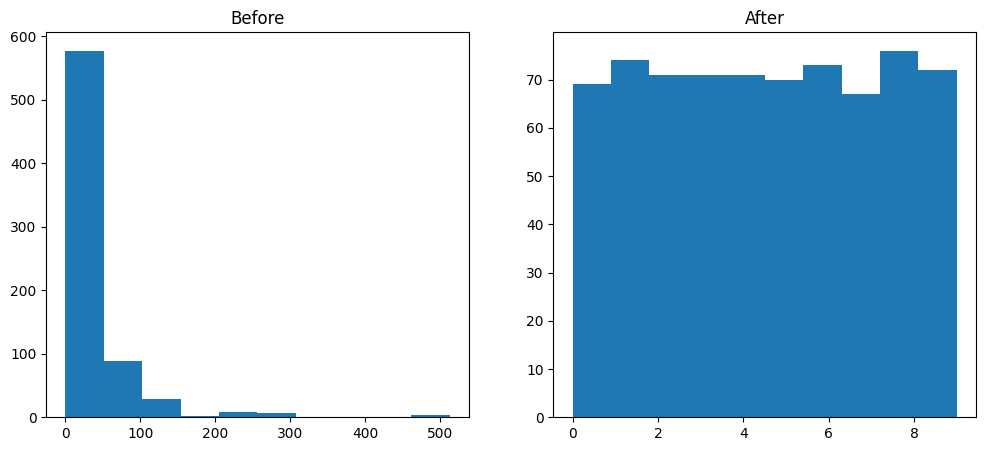

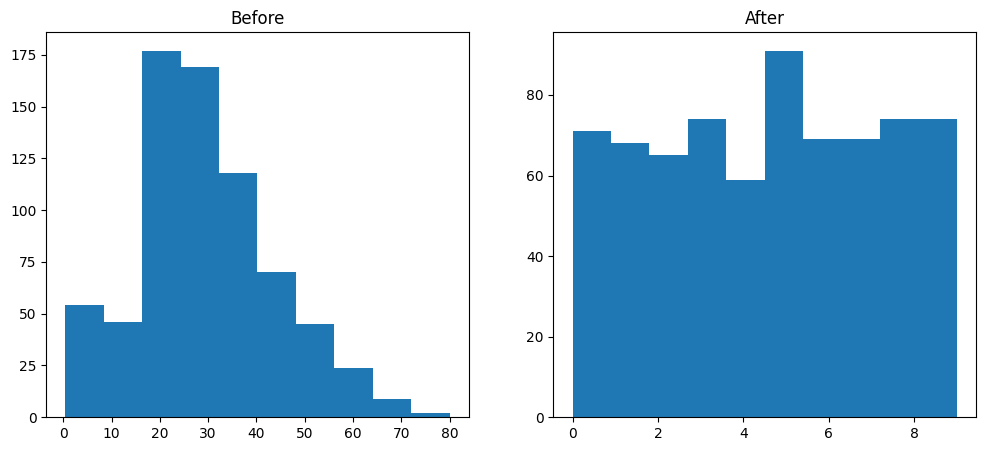

In [48]:
discretize(10,'quantile')